In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('WineQuality'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# IMPORT LIBRARIES

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# LOAD AND PREPARE DATA

In [3]:
import pandas as pd
wine = pd.read_csv('WineQuality.csv')
print(wine)

       Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
0            2732            7.4             0.170         0.29   
1            2607            5.3             0.310         0.38   
2            1653            4.7             0.145         0.29   
3            3264            6.9             0.260         0.29   
4            4931            6.4             0.450         0.07   
...           ...            ...               ...          ...   
32480        2838            5.0             0.255         0.22   
32481        6414            6.6             0.360         0.52   
32482        1126            6.3             0.200         0.24   
32483        2924            6.2             0.200         0.33   
32484        5462            8.1             0.280         0.46   

       residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0                 1.4      0.047                 23.0                 107.0   
1                10.5      0.031     

In [4]:
wine.head()


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [5]:
# Drop first column
wine = wine.drop(wine.columns[0], axis=1)
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [6]:
# Type of data present in each of the columns present in the dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         32485 non-null  float64
 1   volatile acidity      32485 non-null  float64
 2   citric acid           32485 non-null  float64
 3   residual sugar        32485 non-null  float64
 4   chlorides             32485 non-null  float64
 5   free sulfur dioxide   32485 non-null  float64
 6   total sulfur dioxide  32485 non-null  float64
 7   density               32485 non-null  float64
 8   pH                    32485 non-null  float64
 9   sulphates             32485 non-null  float64
 10  alcohol               32485 non-null  float64
 11  quality               32485 non-null  int64  
 12  Type                  32485 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 3.2+ MB


In [7]:
# Descriptive statistical measures of the dataset
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,32485.0,7.214736,1.308216,3.80000,6.4000,7.0000,7.700,15.90000
volatile acidity,32485.0,0.340122,0.164912,0.08000,0.2300,0.2900,0.410,1.58000
citric acid,32485.0,0.318324,0.145152,0.00000,0.2500,0.3100,0.390,1.66000
residual sugar,32485.0,5.438696,4.799221,0.60000,1.8000,3.0000,8.100,65.80000
chlorides,32485.0,0.056009,0.034503,0.00900,0.0380,0.0470,0.065,0.61100
free sulfur dioxide,32485.0,30.458258,17.608076,1.00000,17.0000,29.0000,41.000,289.00000
total sulfur dioxide,32485.0,115.656303,56.456074,6.00000,77.0000,118.0000,156.000,440.00000
density,32485.0,0.994719,0.003015,0.98711,0.9924,0.9949,0.997,1.03898
pH,32485.0,3.219089,0.161441,2.72000,3.1100,3.2100,3.320,4.01000
sulphates,32485.0,0.531500,0.148712,0.22000,0.4300,0.5100,0.600,2.00000


# EXPLORATORY DATA ANALYSIS

In [8]:
# Check the number of null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

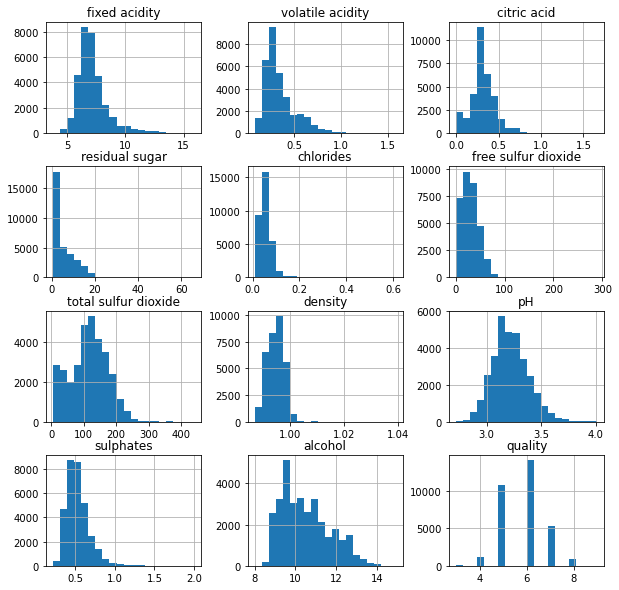

In [9]:
# Draw the histogram to visualise the distribution of the data
wine.hist(bins=20, figsize=(10,10))
plt.show()

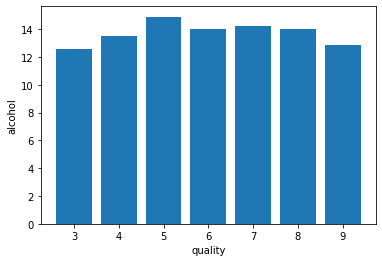

In [22]:
# Draw the count plot to visualise the number data for each quality of wine
import matplotlib.pyplot as plt
import pandas as pd
plt.bar(wine['quality'], wine['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


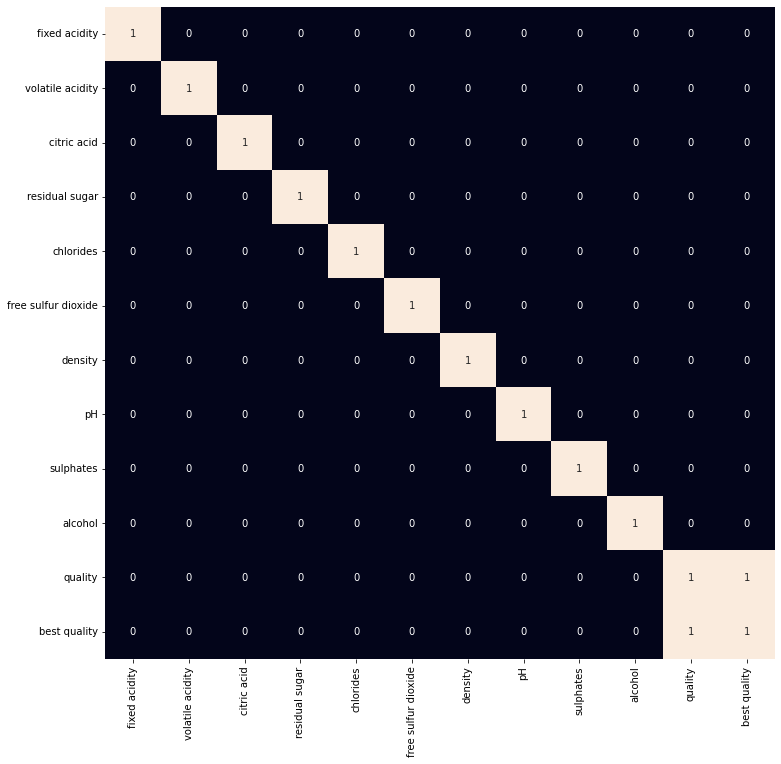

In [26]:
# Find redundant features
plt.figure(figsize=(12,12))
sns.heatmap(wine.drop('Type', axis=1).corr() > 0.7, annot=True, cbar=False)
plt.show()

In [28]:
wine = wine.drop('free sulfur dioxide', axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,Type,best quality
0,7.4,0.170,0.29,1.4,0.047,0.99390,3.52,0.65,10.4,6,1,1
1,5.3,0.310,0.38,10.5,0.031,0.99321,3.34,0.46,11.7,6,1,1
2,4.7,0.145,0.29,1.0,0.042,0.99080,3.76,0.49,11.3,6,1,1
3,6.9,0.260,0.29,4.2,0.043,0.99020,3.16,0.31,12.5,6,1,1
4,6.4,0.450,0.07,1.1,0.030,0.99050,2.97,0.28,10.8,5,1,0


# MODEL DEVELOPMENT

In [29]:
# Create a column that indicates the best wine with 1 and the rest with 0
wine['best quality'] = [1 if x > 5 else 0 for x in wine.quality]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,Type,best quality
0,7.4,0.170,0.29,1.4,0.047,0.99390,3.52,0.65,10.4,6,1,1
1,5.3,0.310,0.38,10.5,0.031,0.99321,3.34,0.46,11.7,6,1,1
2,4.7,0.145,0.29,1.0,0.042,0.99080,3.76,0.49,11.3,6,1,1
3,6.9,0.260,0.29,4.2,0.043,0.99020,3.16,0.31,12.5,6,1,1
4,6.4,0.450,0.07,1.1,0.030,0.99050,2.97,0.28,10.8,5,1,0


In [30]:
# Replace object data type with int for Type column
wine.replace({'White Wine': 1, 'Red Wine': 0}, inplace=True)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,Type,best quality
0,7.4,0.170,0.29,1.4,0.047,0.99390,3.52,0.65,10.4,6,1,1
1,5.3,0.310,0.38,10.5,0.031,0.99321,3.34,0.46,11.7,6,1,1
2,4.7,0.145,0.29,1.0,0.042,0.99080,3.76,0.49,11.3,6,1,1
3,6.9,0.260,0.29,4.2,0.043,0.99020,3.16,0.31,12.5,6,1,1
4,6.4,0.450,0.07,1.1,0.030,0.99050,2.97,0.28,10.8,5,1,0


In [31]:
# Prepare data
features = wine.drop(['quality', 'best quality'], axis=1)
target = wine['best quality']

# Split the data 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)

X_train.shape, X_test.shape

((25988, 10), (6497, 10))

In [32]:
X_test
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,Type
16226,6.9,0.210,0.62,6.3,0.042,0.99358,2.96,0.59,10.20,1
18689,8.0,0.260,0.36,2.0,0.054,0.99200,3.09,0.72,11.60,1
27246,6.8,0.180,0.21,5.4,0.053,0.99445,3.30,0.43,9.40,1
21629,6.6,0.250,0.36,8.1,0.045,0.99580,3.08,0.42,9.20,1
10303,8.7,0.675,0.10,1.6,0.090,0.99745,3.31,0.65,9.55,0
...,...,...,...,...,...,...,...,...,...,...
27640,6.9,0.440,0.18,11.8,0.051,0.99750,3.23,0.48,9.10,1
14501,6.5,0.240,0.38,1.0,0.027,0.98926,3.24,0.36,12.30,1
30727,7.5,0.420,0.14,10.7,0.046,0.99590,3.22,0.33,10.70,1
14555,7.8,0.600,0.26,2.0,0.080,0.99622,3.21,0.52,9.90,0


In [33]:
# Normalise the data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)


In [40]:
X_train
X_test

array([[0.37190083, 0.51333333, 0.08433735, ..., 0.17977528, 0.30434783,
        0.        ],
       [0.27272727, 0.45      , 0.09036145, ..., 0.15730337, 0.2173913 ,
        0.        ],
       [0.25619835, 0.14666667, 0.21686747, ..., 0.07865169, 0.5942029 ,
        1.        ],
       ...,
       [0.24793388, 0.38      , 0.01204819, ..., 0.2247191 , 0.34782609,
        0.        ],
       [0.19834711, 0.13333333, 0.34337349, ..., 0.07865169, 0.50724638,
        1.        ],
       [0.23140496, 0.1       , 0.18072289, ..., 0.15168539, 0.60869565,
        1.        ]])

In [41]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Train some models
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(X_train, y_train)
    
    print(f"{models[i]}: ")
    print("Training Accuracy: ", metrics.roc_auc_score(y_train, models[i].predict(X_train)))
    print("Validation Accuracy: ", metrics.roc_auc_score(y_test, models[i].predict(X_test)))
    print()

LogisticRegression(): 
Training Accuracy:  0.7018121868862662
Validation Accuracy:  0.7146924137449963

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training Accuracy:  0.9813174323437007
Validation Accuracy:  0.9683440328937724

SVC(): 
Training Accuracy:  0.7145339098611561
Validati

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
y_pred = models[1].predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
plt.show()

[[2307  111]
 [  71 4008]]


In [45]:
print(metrics.classification_report(y_test, models[1].predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2418
           1       0.97      0.98      0.98      4079

    accuracy                           0.97      6497
   macro avg       0.97      0.97      0.97      6497
weighted avg       0.97      0.97      0.97      6497

